# New Section

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [3]:

IMAGE_SIZE = 224
pretrained_model = tf.keras.applications.ResNet101(input_shape=(224,224, 3), include_top=False)
pretrained_model.trainable = False

model = tf.keras.Sequential([
            pretrained_model,
           tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation = "relu"),
            
            tf.keras.layers.Dense(2, activation = "softmax")
])

171458560/171446536 [==============================] - 2s 0us/step


In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [4]:
# Train from scratch
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/ML Project Data/Unzipped_data/chest_xray/train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical')


Found 5216 images belonging to 2 classes.


In [7]:
validation_generator = test_dataset.flow_from_directory(
    '/content/drive/MyDrive/ML Project Data/Unzipped_data/chest_xray/val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False)

Found 16 images belonging to 2 classes.


In [8]:
test_generator = test_dataset.flow_from_directory(
    '/content/drive/MyDrive/ML Project Data/Unzipped_data/chest_xray/test',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False)

Found 624 images belonging to 2 classes.


In [11]:
hist = model.fit(train_generator,steps_per_epoch=30 ,epochs=10, validation_data=test_generator) 


Epoch 1/10
30/30 [==============================] - 512s 17s/step - loss: 1.3574 - accuracy: 0.6396 - val_loss: 1.4298 - val_accuracy: 0.6298
Epoch 2/10
30/30 [==============================] - 483s 16s/step - loss: 0.4696 - accuracy: 0.7906 - val_loss: 0.5326 - val_accuracy: 0.7340
Epoch 3/10
30/30 [==============================] - 478s 16s/step - loss: 0.3896 - accuracy: 0.8219 - val_loss: 0.5496 - val_accuracy: 0.7292
Epoch 4/10
30/30 [==============================] - 476s 16s/step - loss: 0.3931 - accuracy: 0.8250 - val_loss: 1.0203 - val_accuracy: 0.6426
Epoch 5/10
30/30 [==============================] - 478s 16s/step - loss: 0.3435 - accuracy: 0.8344 - val_loss: 0.4049 - val_accuracy: 0.8237
Epoch 6/10
30/30 [==============================] - 473s 16s/step - loss: 0.2808 - accuracy: 0.8698 - val_loss: 0.3847 - val_accuracy: 0.8317
Epoch 7/10
30/30 [==============================] - 471s 16s/step - loss: 0.2717 - accuracy: 0.8844 - val_loss: 0.4849 - val_accuracy: 0.7628
Epoch 

**Model Image**

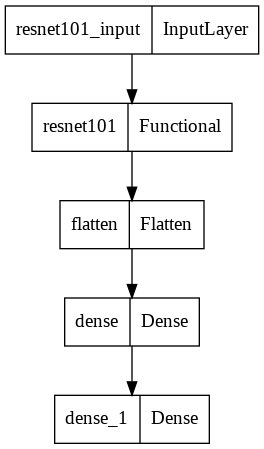

In [12]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='xray-resnet50.png')

**Model Summary**

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 7, 7, 2048)        42658176  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 128)               12845184  
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 55,503,618
Trainable params: 12,845,442
Non-trainable params: 42,658,176
_________________________________________________________________


**Val Accuracy and Loss Graph**

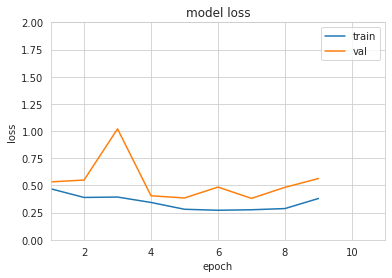

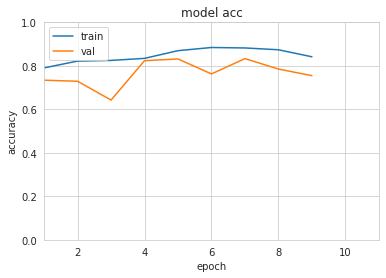

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
%matplotlib inline
history = hist
sns.set_style("whitegrid")
np.random.seed(697)
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.xlim(1, 11)
plt.ylim(0, 2)
plt.show()
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.xlim(1, 11)
plt.ylim(0, 1)
plt.show()

**Confusion Matrix**

In [15]:
from sklearn.metrics import confusion_matrix
import numpy
pred= model.predict(test_generator)
# print(pred)
pred = np.argmax(pred,axis=1)
# print(pred)
true_classes =test_generator.classes
cf = confusion_matrix(true_classes,pred)
cf


array([[ 91, 143],
       [ 10, 380]])

**Confusion Matrix Image**

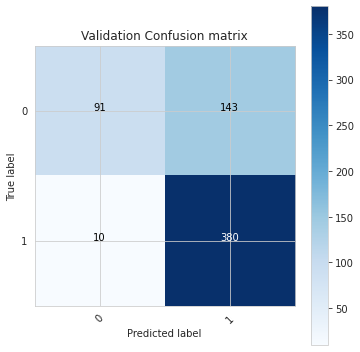

In [16]:

# Look at confusion matrix 
import itertools
plt.rcParams['figure.figsize'] = (5, 5)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Validation Confusion matrix',
                          cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matricesfor61classbangengtype.png', dpi=100)


plot_confusion_matrix(confusion_matrix(true_classes, pred) ,classes = range(2))

In [17]:
import sklearn.metrics as metrics
# class_labels = list(validation_generator.class_indices.keys())  
report = metrics.classification_report(true_classes, pred)
print(report) 

              precision    recall  f1-score   support

           0       0.90      0.39      0.54       234
           1       0.73      0.97      0.83       390

    accuracy                           0.75       624
   macro avg       0.81      0.68      0.69       624
weighted avg       0.79      0.75      0.72       624



**Test Losss and accuracy graph**

In [18]:
from sklearn.metrics import confusion_matrix
import numpy
pred= model.predict(validation_generator)
# print(pred)
pred = np.argmax(pred,axis=1)
# print(pred)
true_classes = validation_generator.classes
cf = confusion_matrix(true_classes,pred)
cf

array([[2, 6],
       [0, 8]])

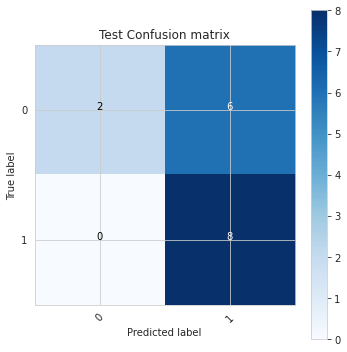

In [19]:
# Look at confusion matrix 
import itertools
plt.rcParams['figure.figsize'] = (5, 5)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Test Confusion matrix',
                          cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matricesfor61classbangengtype.png', dpi=100)


plot_confusion_matrix(confusion_matrix(true_classes, pred) ,classes = range(2))

In [20]:
import sklearn.metrics as metrics
# class_labels = list(validation_generator.class_indices.keys())  
report = metrics.classification_report(true_classes, pred)
print(report) 

              precision    recall  f1-score   support

           0       1.00      0.25      0.40         8
           1       0.57      1.00      0.73         8

    accuracy                           0.62        16
   macro avg       0.79      0.62      0.56        16
weighted avg       0.79      0.62      0.56        16

